# Import Library Needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Path

In [2]:
mainPath = "/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Praktikum Data Science/Final Project [Introduction Data Mining]/"

In [3]:
dataPath = mainPath + "/Dataset/Student-Employability-Datasets.xlsx"

# Load Data

In [4]:
df = pd.read_excel(dataPath)
df.head(5)

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


# Explore Data Analysis

In [5]:
df.isnull().sum()

Name of Student               0
GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


## Class Counting

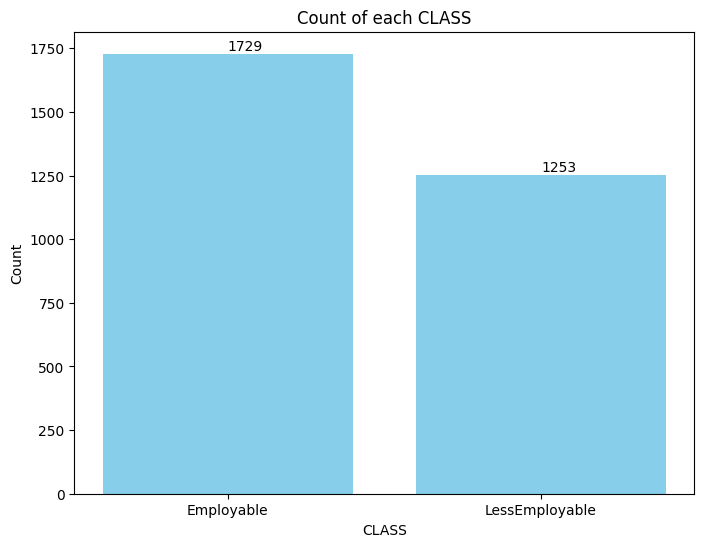

In [7]:
# Data
class_counts = df['CLASS'].value_counts()

# Plot dengan Matplotlib
plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts, color='skyblue')

# Menambahkan label pada setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Menambahkan label pada sumbu x dan y
plt.xlabel('CLASS')
plt.ylabel('Count')

# Menambahkan judul plot
plt.title('Count of each CLASS')

# Menampilkan plot
plt.show()

In [8]:
df.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
df.drop('Name of Student', axis=1, inplace=True)

In [10]:
df = df.rename(columns={"GENERAL APPEARANCE": "GENERAL_APPEARANCE", "MANNER OF SPEAKING": "MANNER_OF_SPEAKING", "PHYSICAL CONDITION": "PHYSICAL_CONDITION", "MENTAL ALERTNESS": "MENTAL_ALERTNESS", "ABILITY TO PRESENT IDEAS": "ABILITY_TO_PRESENT_IDEAS", "COMMUNICATION SKILLS": "COMMUNICATION_SKILLS"})

## Min Max Value for Every Columns

In [11]:
for i in df.columns:
  print(f"Maximal:{i, max(df[i])}")
  print(f"Minimal:{i, min(df[i])}")
  print("--- --- --- "*2)

Maximal:('GENERAL_APPEARANCE', 5)
Minimal:('GENERAL_APPEARANCE', 2)
--- --- --- --- --- --- 
Maximal:('MANNER_OF_SPEAKING', 5)
Minimal:('MANNER_OF_SPEAKING', 2)
--- --- --- --- --- --- 
Maximal:('PHYSICAL_CONDITION', 5)
Minimal:('PHYSICAL_CONDITION', 2)
--- --- --- --- --- --- 
Maximal:('MENTAL_ALERTNESS', 5)
Minimal:('MENTAL_ALERTNESS', 2)
--- --- --- --- --- --- 
Maximal:('SELF-CONFIDENCE', 5)
Minimal:('SELF-CONFIDENCE', 2)
--- --- --- --- --- --- 
Maximal:('ABILITY_TO_PRESENT_IDEAS', 5)
Minimal:('ABILITY_TO_PRESENT_IDEAS', 2)
--- --- --- --- --- --- 
Maximal:('COMMUNICATION_SKILLS', 5)
Minimal:('COMMUNICATION_SKILLS', 2)
--- --- --- --- --- --- 
Maximal:('Student Performance Rating', 5)
Minimal:('Student Performance Rating', 3)
--- --- --- --- --- --- 
Maximal:('CLASS', 'LessEmployable')
Minimal:('CLASS', 'Employable')
--- --- --- --- --- --- 


In [12]:
df.head()

,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,Employable
1,4,4,4,4,4,4,3,5,Employable
2,4,3,3,3,3,3,2,5,LessEmployable
3,3,3,3,2,3,3,3,5,LessEmployable
4,4,4,3,3,4,4,3,5,Employable


## Analisis Bivariate


<Figure size 1000x600 with 0 Axes>

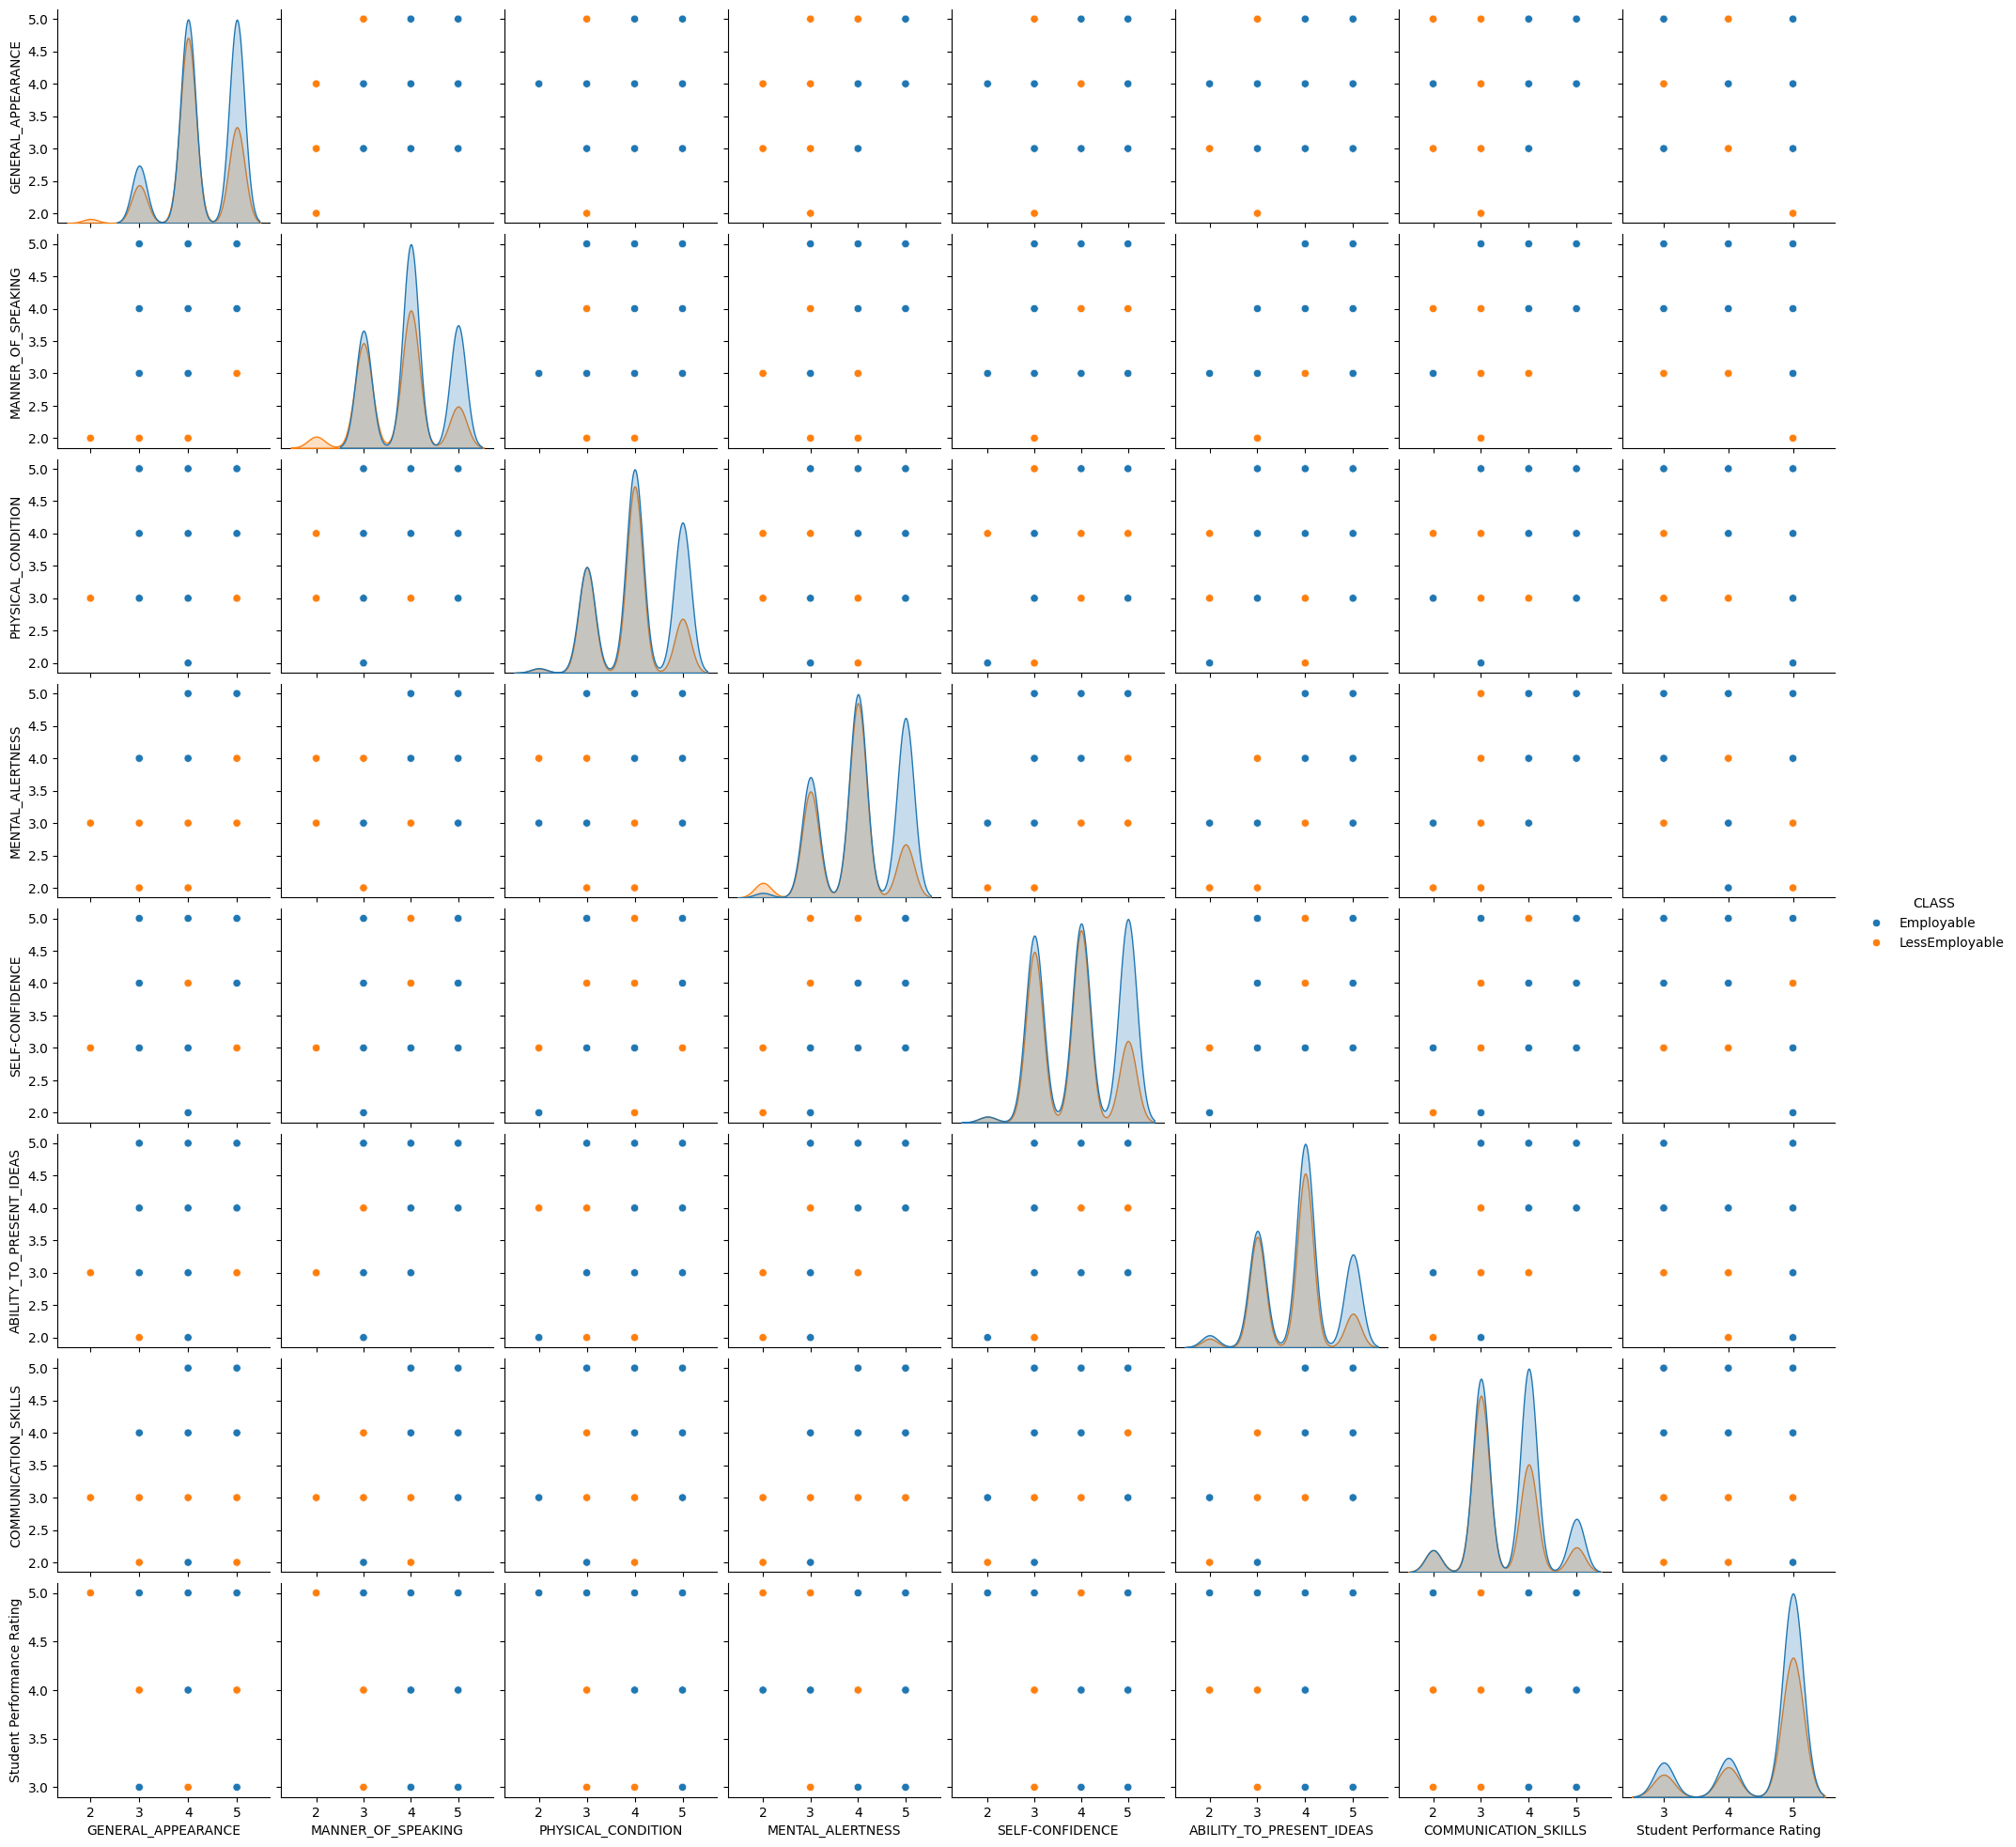

In [13]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='CLASS')
plt.show()

In [14]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Kodekan variabel kategorikal
df['CLASS_encoded'] = label_encoder.fit_transform(df['CLASS'])

## Visualisasi Korelasi

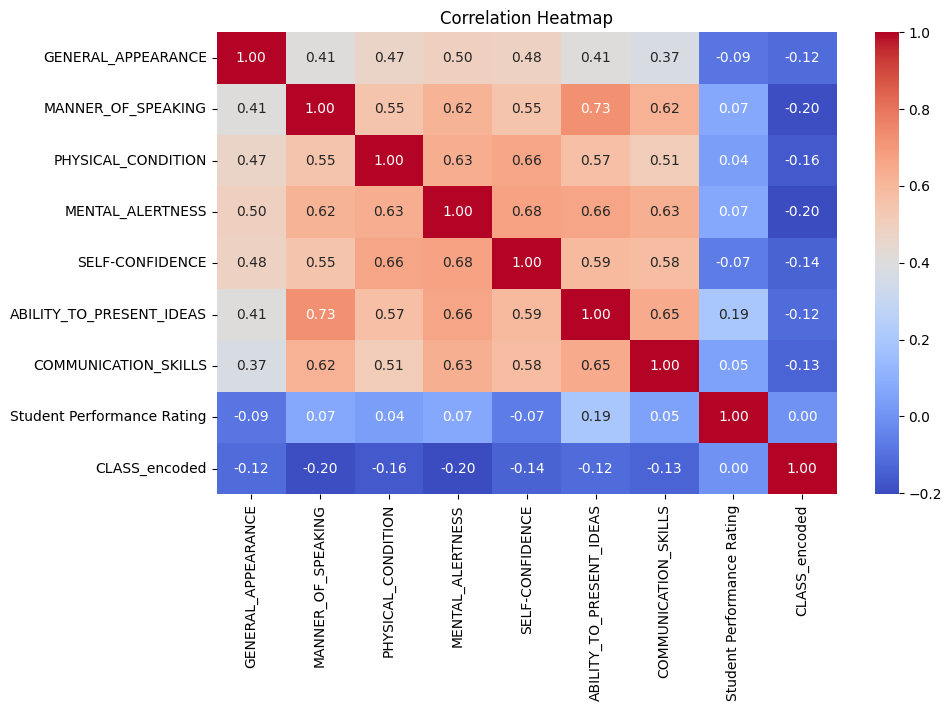

In [15]:
# Langkah 6:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns="CLASS").corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Splitting Data ( X , y )

In [16]:
X = df.drop('CLASS', axis=1)
y = df['CLASS']

# SMOTE Unbalanced Data

In [17]:
# Inisialisasi SMOTE
smote = SMOTE()

# Melakukan oversampling menggunakan SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan hasil oversampling
print("Sebelum SMOTE:", y.value_counts())
print("Setelah SMOTE:", y_resampled.value_counts())

Sebelum SMOTE: CLASS
Employable        1729
LessEmployable    1253
Name: count, dtype: int64
Setelah SMOTE: CLASS
Employable        1729
LessEmployable    1729
Name: count, dtype: int64


# MinMaxScaler (Normalisasi)

In [18]:
# Inisialisasi MinMaxScaler dengan rentang 0 hingga 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Memilih kolom yang akan di-scaling
columns_to_scale = X_resampled.columns

In [19]:
X_resampled_scaled = X_resampled.copy()

# Melakukan penskalaan pada kolom yang dipilih
X_resampled_scaled[columns_to_scale] = scaler.fit_transform(X_resampled[columns_to_scale])

In [20]:
y_resampled.value_counts()

CLASS
Employable        1729
LessEmployable    1729
Name: count, dtype: int64

In [21]:
# X["Student Performance Rating"].value_counts()
X_resampled_scaled["Student Performance Rating"].value_counts()

# for i in x_scaled["Student Performance Rating"]:
#   print(i)

Student Performance Rating
1.0    2526
0.5     503
0.0     429
Name: count, dtype: int64

# Splitting Data ( X_train, X_test, y_train, y_test )

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, random_state=70)

# Modeling (K-Neighbors Classifier)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model = KNeighborsClassifier(n_neighbors=3)

In [25]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
Y_pred = model.predict(X_test)

In [27]:
Y_pred

array(['LessEmployable', 'LessEmployable', 'LessEmployable', 'Employable',
       'Employable', 'Employable', 'LessEmployable', 'LessEmployable',
       'Employable', 'LessEmployable', 'LessEmployable', 'LessEmployable',
       'Employable', 'Employable', 'LessEmployable', 'Employable',
       'Employable', 'Employable', 'LessEmployable', 'LessEmployable',
       'LessEmployable', 'Employable', 'Employable', 'LessEmployable',
       'LessEmployable', 'LessEmployable', 'LessEmployable',
       'LessEmployable', 'LessEmployable', 'LessEmployable', 'Employable',
       'LessEmployable', 'Employable', 'Employable', 'Employable',
       'LessEmployable', 'LessEmployable', 'Employable', 'Employable',
       'Employable', 'LessEmployable', 'Employable', 'LessEmployable',
       'Employable', 'Employable', 'Employable', 'LessEmployable',
       'Employable', 'Employable', 'Employable', 'LessEmployable',
       'LessEmployable', 'Employable', 'LessEmployable', 'LessEmployable',
       'Employab

# Evaluasi Model

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

# Menghitung akurasi
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [29]:
# Menghitung presisi
precision = precision_score(y_test, Y_pred, pos_label='Employable')
print("Precision:", precision)

# Menghitung recall
recall = recall_score(y_test, Y_pred, pos_label='Employable')
print("Recall:", recall)

# Menghitung F1-score
f1 = f1_score(y_test, Y_pred, pos_label='Employable')
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [30]:
# Menghitung Area di bawah Kurva ROC (ROC-AUC)
roc_auc = roc_auc_score(label_encoder.transform(y_test), label_encoder.fit_transform(Y_pred))
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 1.0


Confusion Matrix:
[[417   0]
 [  0 448]]


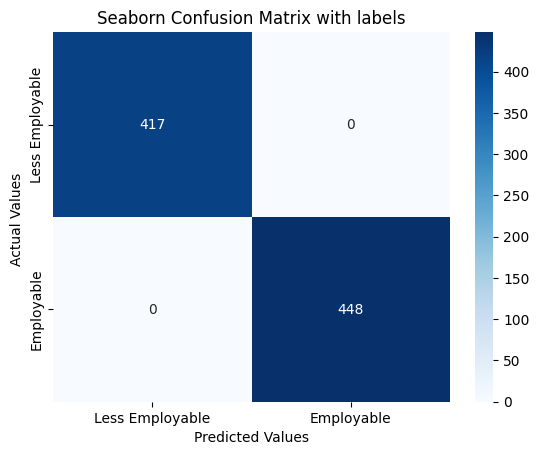

In [31]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Less Employable","Employable"])
ax.yaxis.set_ticklabels(["Less Employable","Employable"])

plt.show()

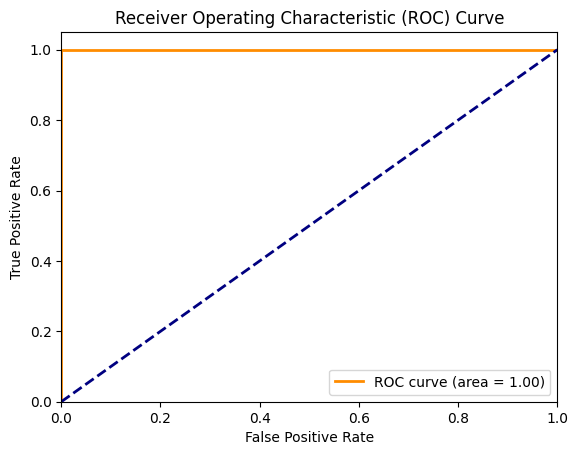

In [32]:
# Menghitung nilai prediksi probabilitas dari model
Y_pred_prob = model.predict_proba(X_test)

# Mendapatkan FPR, TPR, dan threshold menggunakan roc_curve
fpr, tpr, thresholds = roc_curve(label_encoder.transform(y_test), Y_pred_prob[:, 1])

# Menghitung area di bawah kurva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
# Menampilkan classification report
class_report = classification_report(y_test, Y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
                precision    recall  f1-score   support

    Employable       1.00      1.00      1.00       417
LessEmployable       1.00      1.00      1.00       448

      accuracy                           1.00       865
     macro avg       1.00      1.00      1.00       865
  weighted avg       1.00      1.00      1.00       865

